In [10]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Successfully imported")

Successfully imported


In [11]:
# Loading the dataset and displying the first few rows
df = pd.read_csv("../student/student-mat.csv",sep =";")
print("First few rows of the dataset: \n")
print(df.head())

First few rows of the dataset: 

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [12]:
# Additional information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [13]:
# Data Exploration
# Checking for missing values
print("Checking for missing values: \n")
print(df.isnull().sum())

Checking for missing values: 

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [14]:
# Displaying the column datatype
print("Displaying the column datatype: \n")
print(df.dtypes ,"\n")

# Displaying the dataset's size
print("Dataset size:")
print(df.shape)

Displaying the column datatype: 

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object 

Dataset size:
(395, 33)


In [15]:
# Data Cleaning
# Handle missing values (if any) by replacing them with the median
print("Handling missing values (if any):")
df = df.fillna(df.median(numeric_only=True))
df = df.drop_duplicates()
print("After cleaning, dataset size:", df.shape)

Handling missing values (if any):
After cleaning, dataset size: (395, 33)


# Data Analysis Questions

In [17]:
# Q1 -> What is the average score in math (G3)?
avg_score = df["G3"].mean()
print(f"1. The Average of (G3) Final Grade is : {avg_score:.2f} \n")

# Q2 -> How many students scored above 15 in their final grade (G3)?
std_marks_above_15 = (df["G3"] > 15).sum()
print(f"2. Number of students who scored above 15: {std_marks_above_15} \n")

# Q3 -> Is there a correlation between study time (study time) and the final grade (G3)?
correlation = df["studytime"].corr(df["G3"])
print(f"3. Correlation between study time and final grade: {correlation:.2f} \n")

# Q4 -> Which gender has a higher average final grade (G3)?
avg_by_gender = df.groupby("sex")["G3"].mean()
print(f"4. Average final grades by gender: {avg_by_gender}")

1. The Average of (G3) Final Grade is : 10.42 

2. Number of students who scored above 15: 40 

3. Correlation between study time and final grade: 0.10 

4. Average final grades by gender: sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


# Data Visualization

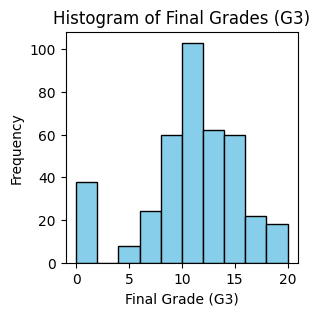

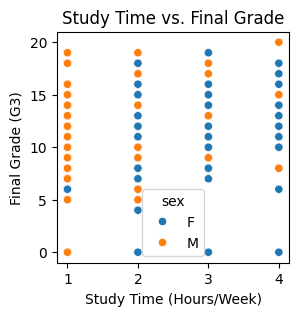

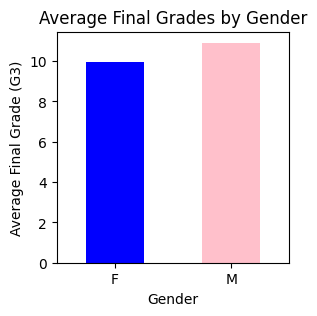

In [18]:
# Plot a histogram of final grades (G3)
plt.figure(figsize=(3, 3))
plt.hist(df["G3"], bins=10, color="skyblue", edgecolor="black")
plt.title("Histogram of Final Grades (G3)")
plt.xlabel("Final Grade (G3)")
plt.ylabel("Frequency")
plt.show()

# Create a scatter plot between study time (study time) and final grade (G3).
plt.figure(figsize=(3, 3))
sns.scatterplot(x="studytime", y="G3", data=df, color="green", hue="sex")
plt.title("Study Time vs. Final Grade")
plt.xlabel("Study Time (Hours/Week)")
plt.ylabel("Final Grade (G3)")
plt.show()

# Create a bar chart comparing the average scores of male and female students
plt.figure(figsize=(3, 3))
avg_by_gender.plot(kind="bar",color=["blue","pink"])
plt.xticks(rotation=0)
plt.title("Average Final Grades by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Final Grade (G3)")
plt.show()